In [1]:
import os 
import pytorch_lightning as pl
import seml
import numpy as np
import torch
from sacred import SETTINGS, Experiment
from functools import partial

import scanpy as sc
import scvelo as scv
import cellrank as cr

from PerturbSeq_CMV.datamodules.distribution_datamodule import TrajectoryDataModule
from PerturbSeq_CMV.models.cfm_module import CFMLitModule
from PerturbSeq_CMV.models.components.augmentation import AugmentationModule
from PerturbSeq_CMV.models.components.simple_mlp import VelocityNet

from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping
from pytorch_lightning.loggers import WandbLogger

from torch.optim import AdamW

import yaml

import sys 
sys.path.insert(0, "../../../" )
from paths import EXPERIMENT_FOLDER

**Import configs**

In [2]:
with open("/nfs/homedirs/pala/PerturbSeq_CMV/configs/datasets_standard_run/unperturbed_time_course_viral_low.yaml", "r") as stream:
    hparams = yaml.safe_load(stream)["fixed"]

In [3]:
task_name = hparams["training.training"]["task_name"]
        
# Fix seed for reproducibility
torch.manual_seed(hparams["training.training"]["seed"])      
if hparams["training.training"]["seed"]: 
    pl.seed_everything(hparams["training.training"]["seed"], workers=True)

# Initialize folder 
current_experiment_dir = EXPERIMENT_FOLDER / task_name
current_experiment_dir.mkdir(parents=True, exist_ok=True) 
    

# Initialize datamodule
datamodule = TrajectoryDataModule(**hparams["datamodule.datamodule"])
    

# Initialize augmentations
augmentations = AugmentationModule(**hparams["augmentations.augmentations"])
         

# Neural network 
net = partial(VelocityNet, **hparams["net.net"])   


# Initialize the model 
model = CFMLitModule(
                    net=net,
                    datamodule=datamodule,
                    augmentations= augmentations, 
                    **hparams["model.model"]
                    ) 
        

# Initialize callbacks 
model_ckpt_callbacks = ModelCheckpoint(dirpath=current_experiment_dir / "checkpoints", 
                                        **hparams["model_checkpoint.model_checkpoint"])


# Initialize callbacks 
early_stopping_callbacks = EarlyStopping(**hparams["early_stopping.early_stopping"])
        

# Initialize logger 
logger = WandbLogger(save_dir=current_experiment_dir / "logs", 
                     **hparams["logger.logger"]) 
        

# Initialize the lightning trainer 
trainer = Trainer(default_root_dir=current_experiment_dir,
                  callbacks=[model_ckpt_callbacks, early_stopping_callbacks], 
                  logger=logger, 
                  **hparams["trainer.trainer"])
        

# Fit the model 
trainer.fit(model=model, 
                  train_dataloaders=datamodule.train_dataloader(),
                  val_dataloaders=datamodule.val_dataloader())
train_metrics = trainer.callback_metrics

# Test model 
ckpt_path = trainer.checkpoint_callback.best_model_path
if ckpt_path == "":
    ckpt_path = None
trainer.test(model=model, datamodule=datamodule, ckpt_path=ckpt_path)
test_metrics = trainer.callback_metrics

# merge train and test metrics
metric_dict = {**train_metrics, **test_metrics}

[rank: 0] Global seed set to 42
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: allepalma. Use `wandb login --relogin` to force relogin
wandb: WARNING Path /nfs/homedirs/pala/PerturbSeq_CMV/project_folder/experiments/unperturbed_time_course_viral_low/logs/wandb/ wasn't writable, using system temp directory.
wandb: WARNING Path /nfs/homedirs/pala/PerturbSeq_CMV/project_folder/experiments/unperturbed_time_course_viral_low/logs/wandb/ wasn't writable, using system temp directory


/nfs/homedirs/pala/miniconda3/envs/PerturbSeq_CMV/lib/python3.9/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /nfs/homedirs/pala/miniconda3/envs/PerturbSeq_CMV/li ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/nfs/homedirs/pala/miniconda3/envs/PerturbSeq_CMV/lib/python3.9/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /nfs/homedirs/pala/miniconda3/envs/PerturbSeq_CMV/li ...
  rank_zero_warn(
/nfs/homedirs/pala/miniconda3/envs/Per

Sanity Checking: 0it [00:00, ?it/s]

/nfs/homedirs/pala/miniconda3/envs/PerturbSeq_CMV/lib/python3.9/site-packages/pytorch_lightning/loops/fit_loop.py:280: PossibleUserWarning: The number of training batches (3) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
Restoring states from the checkpoint path at /nfs/students/pala/PerturbSeq_CMV/experiments/unperturbed_time_course_viral_low/checkpoints/epoch_0085-v2.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at /nfs/students/pala/PerturbSeq_CMV/experiments/unperturbed_time_course_viral_low/checkpoints/epoch_0085-v2.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test/loss         │    0.4360869228839874     │
│         test/mse          │    0.4360869228839874     │
│         test/reg          │            0.0            │
└───────────────────────────┴───────────────────────────┘

**Analysis velocity**

In [7]:
adata = sc.read_h5ad("/nfs/homedirs/pala/PerturbSeq_CMV/project_folder/data/processed/unperturbed_time_course_viral_low.h5ad")
adata = adata[:, adata.var.highly_variable]

In [8]:
def add_velocity_to_adata(adata, model):
    # Put model in evaluation mode
    model.eval()
    velocities = []
    with torch.no_grad():
        for i, x in enumerate(adata.X.A):
            t = torch.tensor(adata.obs.experimental_time[i]).view(1, -1).float()
            x = torch.from_numpy(x).to(model.device).view(1, -1).float()
            dx_dt = model(t,x)
            velocities.append(dx_dt.cpu().numpy())
    velocities = np.concatenate(velocities, axis=0)

    adata.layers["velocity"] = velocities

In [9]:
add_velocity_to_adata(adata, model)

In [10]:
vk = cr.kernels.VelocityKernel(adata,
                          xkey="X", 
                        vkey="velocity").compute_transition_matrix()

ck = cr.kernels.ConnectivityKernel(adata).compute_transition_matrix()


combined_kernel = 0.8 * vk + 0.2 * ck

combined_kernel.compute_transition_matrix().compute_projection(basis="umap")

  0%|          | 0/6297 [00:00<?, ?cell/s]

  0%|          | 0/6297 [00:00<?, ?cell/s]

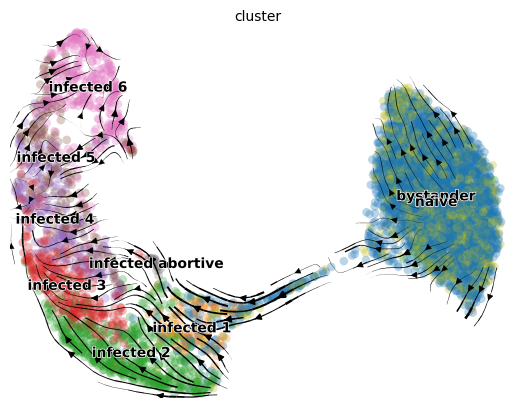

In [11]:
scv.pl.velocity_embedding_stream(adata, vkey="T_fwd", basis="umap", color="cluster")

In [12]:
gpcc = cr.estimators.GPCCA(combined_kernel)

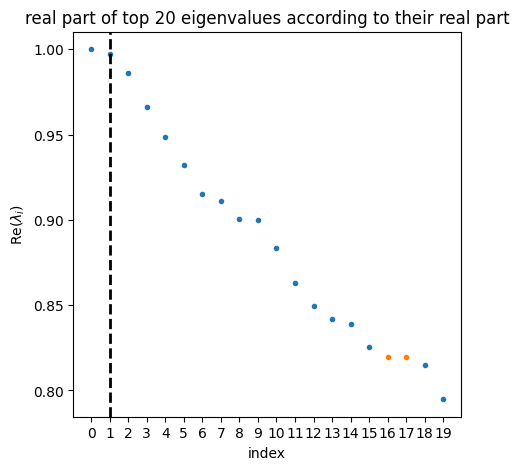

In [13]:
gpcc.compute_schur(n_components=20)
gpcc.plot_spectrum(real_only=True)

In [21]:
gpcc.compute_macrostates(n_states=6, cluster_key="cluster")

/nfs/homedirs/pala/miniconda3/envs/PerturbSeq_CMV/lib/python3.9/site-packages/scvelo/plotting/scatter.py:614: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


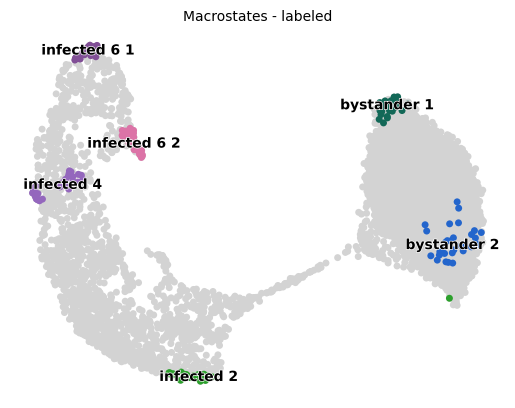

In [22]:
gpcc.plot_macrostates(
    discrete=True, size=100, basis="umap", title="Macrostates - labeled"
)